<!-- cluster size ~ data count (cluster num reads num contacts num)

chr count pct < 5% 弃掉最少chr ~ data count 

cis pct > 10%  ~ data count

近距离互作 pair > 1000 ~ data count

弃掉trans? ~ data count

去掉背景spot -->


In [ ]:

import math
import os
import yaml
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import math
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams["font.size"] = 15


In [ ]:
with open("/home/spaceA/config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

# sampleid_list= config['spatial_infor'].keys()
sampleid_list=['E11.5L1','E11.5L2','E12.5L5','E12.5L6','E13.5C1',
                'E13.5C4','E13.5C6','E14.5F5','E14.5F6']

In [ ]:
out_dir='/home/spaceA/SpatialSPRITE_res/Filter_Spot_v4'
os.makedirs(out_dir,exist_ok=True)
os.chdir(out_dir)


  0%|          | 0/9 [00:00<?, ?it/s]

E11.5L1


 11%|█         | 1/9 [00:06<00:50,  6.33s/it]

E11.5L2


 22%|██▏       | 2/9 [00:12<00:44,  6.35s/it]

E12.5L5


 33%|███▎      | 3/9 [00:17<00:34,  5.80s/it]

E12.5L6


 44%|████▍     | 4/9 [00:23<00:27,  5.58s/it]

E13.5C1


 56%|█████▌    | 5/9 [00:29<00:23,  5.82s/it]

E13.5C4


 67%|██████▋   | 6/9 [00:35<00:17,  5.99s/it]

E13.5C6


 78%|███████▊  | 7/9 [00:42<00:12,  6.15s/it]

E14.5F5


 89%|████████▉ | 8/9 [00:48<00:06,  6.34s/it]

E14.5F6


100%|██████████| 9/9 [00:55<00:00,  6.18s/it]


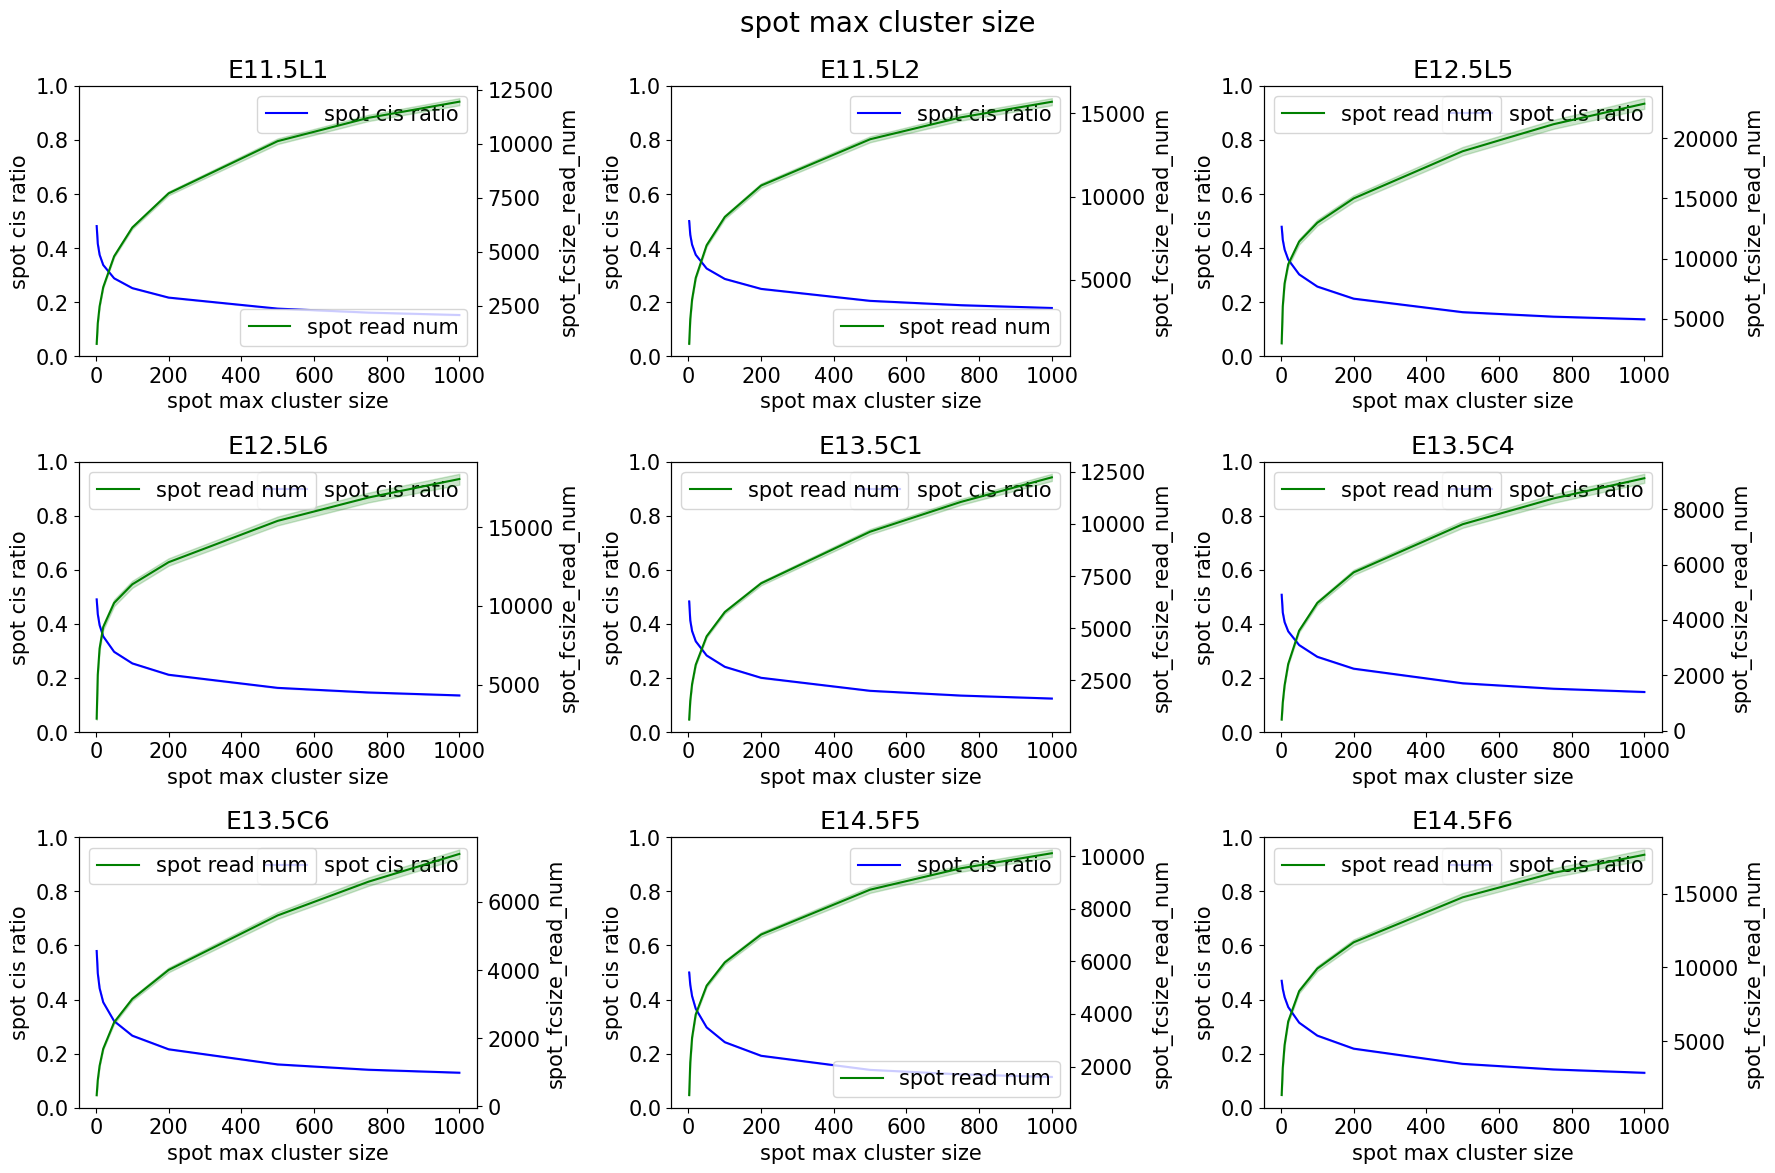

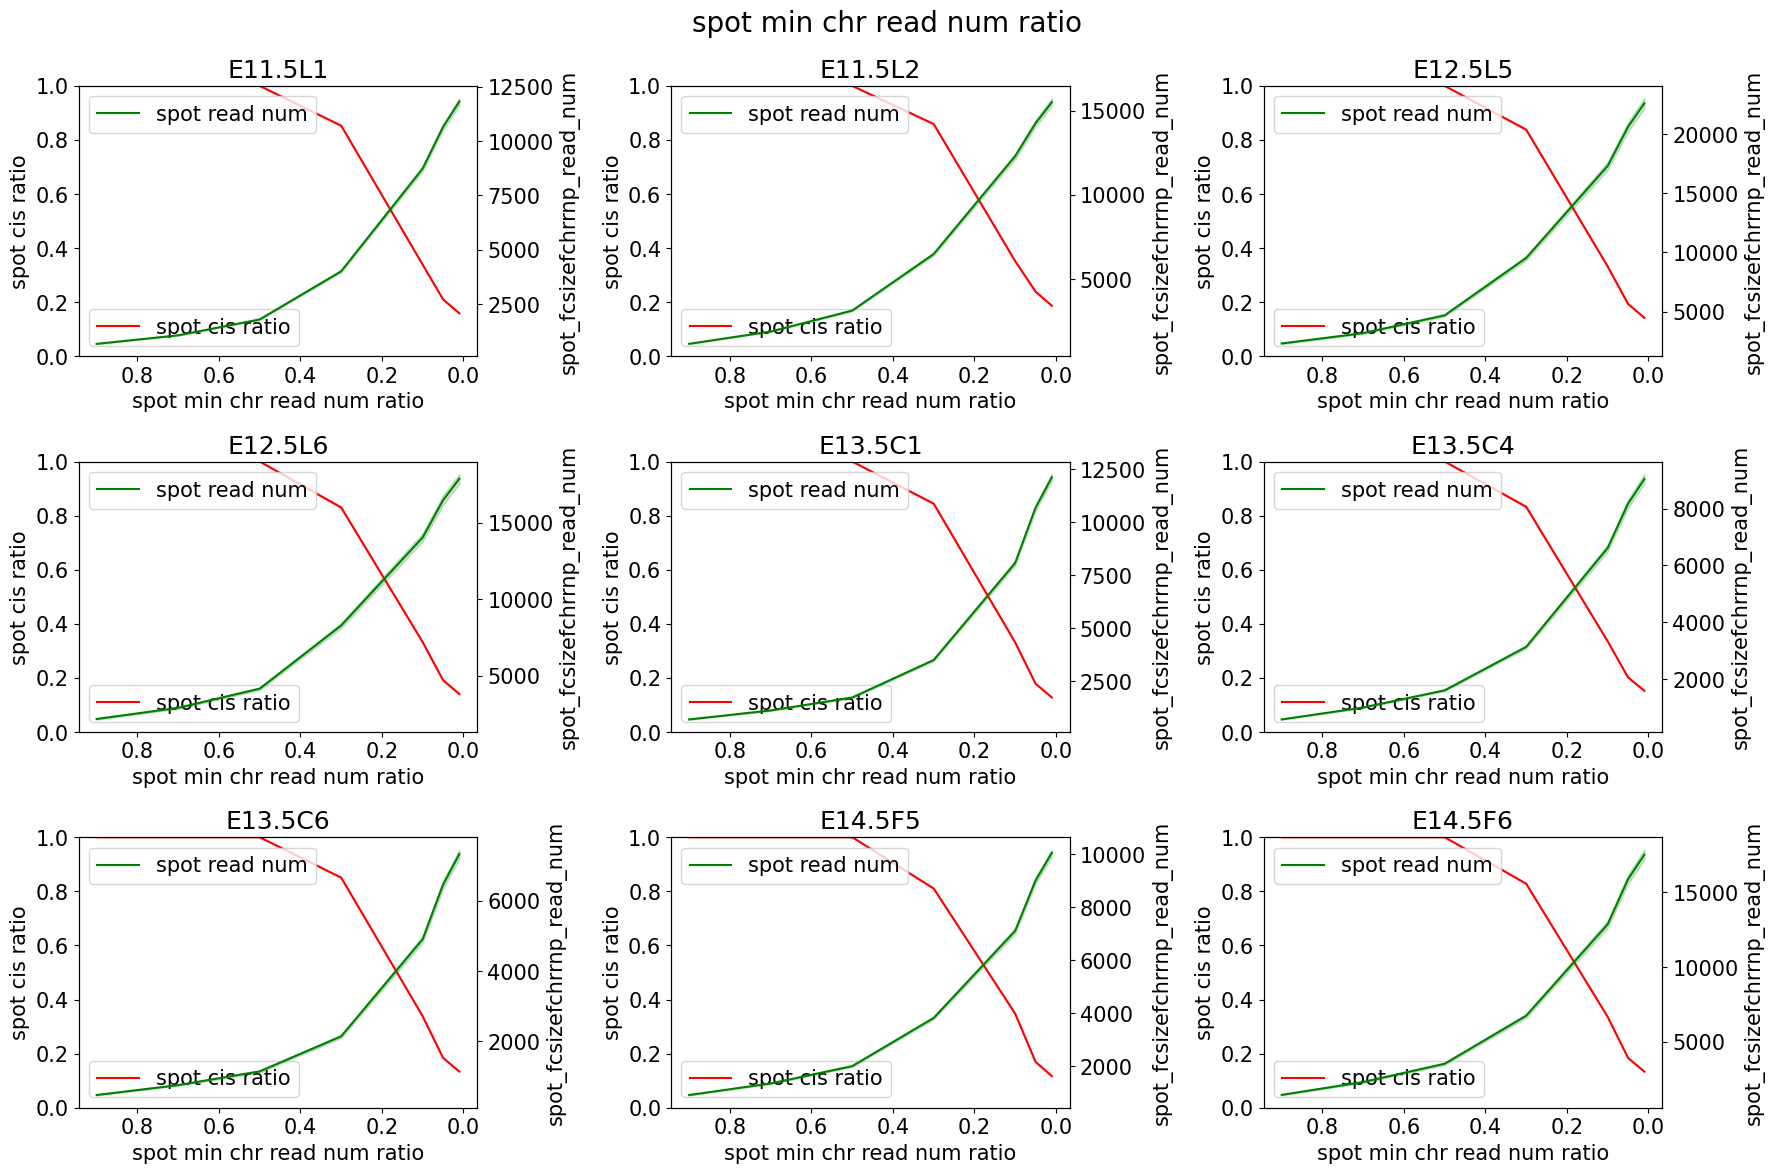

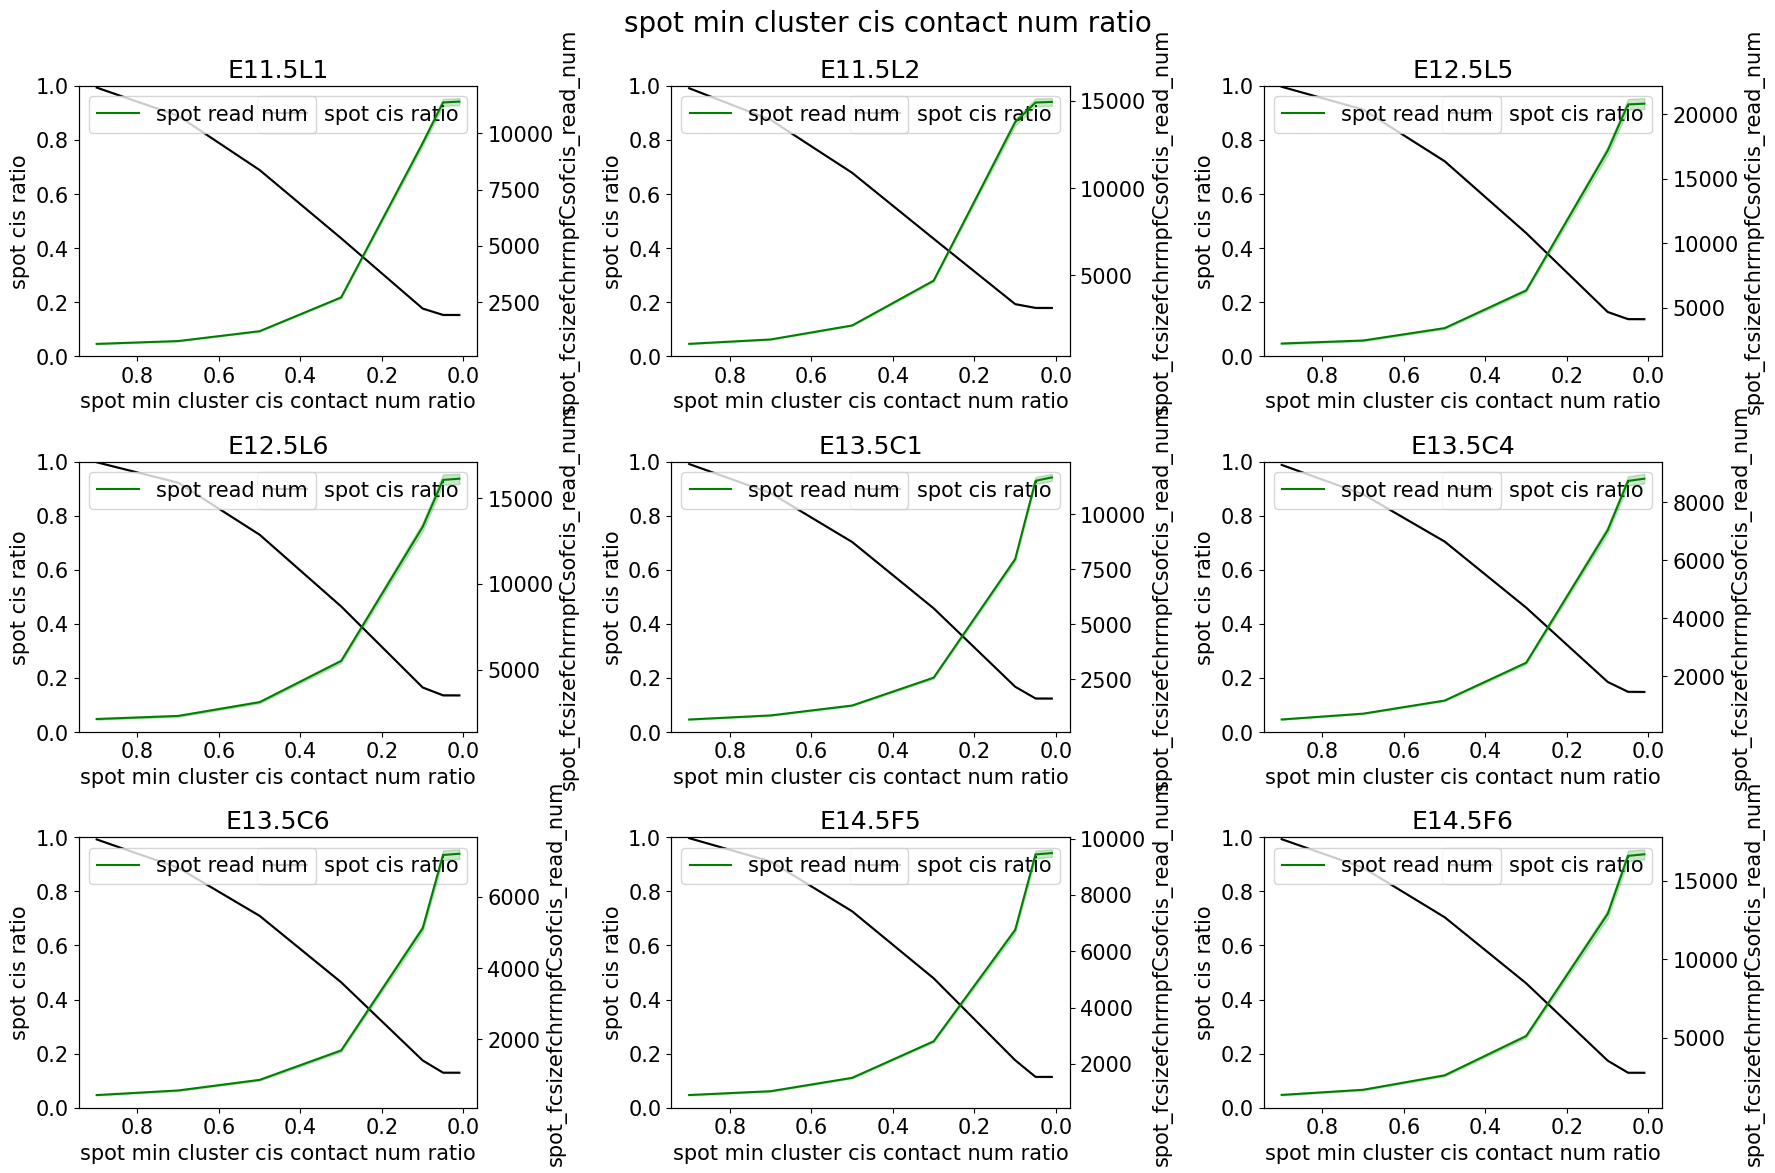

In [13]:
ncols=3
nrows=math.ceil(len(sampleid_list)/ncols)
s_width=6
s_height=4

fig_max_C_size, axs_max_C_size = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height));
fig_min_chr_read_num_ratio, axs_min_chr_read_num_ratio = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height));
fig_min_C_cis_ct_num_ratio, axs_min_C_cis_ct_num_ratio = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height));

for f,sample_name in enumerate(tqdm(sampleid_list)):
    print(sample_name)
    row_num=math.floor(f/ncols)
    col_num=f % ncols 

    ######################### spot max cluster size
    spot_max_C_size_f=os.path.join(out_dir,sample_name+'_spot_infor_determine_max_C_size.csv')
    spot_max_C_size=pd.read_csv(spot_max_C_size_f,index_col=0)
    
    sns.lineplot(data=spot_max_C_size,x='max_C_size', y='spot_fcsize_cis_ct_num_ratio',
                label='spot cis ratio', ax=axs_max_C_size[row_num,col_num], color='blue',
                estimator='mean', errorbar=('ci', 95))
    axs_max_C_size[row_num,col_num].set_ylim(0, 1)
    axs_max_C_size[row_num,col_num].set_ylabel('spot cis ratio')
    axs_max_C_size[row_num,col_num].set_xlabel('spot max cluster size')

    sns.lineplot(data=spot_max_C_size,x='max_C_size', y='spot_fcsize_read_num', 
                 ax=axs_max_C_size[row_num,col_num].twinx(),
                label='spot read num',color='green',estimator='mean', errorbar=('ci', 95))
    axs_max_C_size[row_num,col_num].set_title(sample_name)
    fig_max_C_size.suptitle('spot max cluster size', fontsize=20)
    fig_max_C_size.tight_layout()
    fig_max_C_size.show()
    fig_max_C_size.savefig('all_samples_spot_infor_determine_max_C_size.pdf')

    ######################### spot spot min chr read num ratio
    spot_min_chr_read_num_ratio_f=os.path.join(out_dir,sample_name+'_spot_infor_determine_min_chr_read_num_ratio.csv')
    spot_min_chr_read_num_ratio=pd.read_csv(spot_min_chr_read_num_ratio_f,index_col=0)

    sns.lineplot(data=spot_min_chr_read_num_ratio,x='min_chr_read_num_ratio', y='spot_fcsizefchrrnp_cis_ct_num_ratio',
                label='spot cis ratio', ax=axs_min_chr_read_num_ratio[row_num,col_num], color='red',estimator='mean', errorbar=('ci', 95))
    axs_min_chr_read_num_ratio[row_num,col_num].set_ylim(0, 1)
    axs_min_chr_read_num_ratio[row_num,col_num].set_ylabel('spot cis ratio')
    axs_min_chr_read_num_ratio[row_num,col_num].set_xlabel('spot min chr read num ratio')
    axs_min_chr_read_num_ratio[row_num,col_num].invert_xaxis()

    sns.lineplot(data=spot_min_chr_read_num_ratio,x='min_chr_read_num_ratio', y='spot_fcsizefchrrnp_read_num', 
                 ax=axs_min_chr_read_num_ratio[row_num,col_num].twinx(),
                label='spot read num',color='green',estimator='mean', errorbar=('ci', 95))
    axs_min_chr_read_num_ratio[row_num,col_num].set_title(sample_name)
    fig_min_chr_read_num_ratio.suptitle('spot min chr read num ratio', fontsize=20)
    fig_min_chr_read_num_ratio.tight_layout()
    fig_min_chr_read_num_ratio.show()
    fig_min_chr_read_num_ratio.savefig('all_samples_spot_infor_determine_min_chr_read_num_ratio.pdf')

    ######################### spot min cluster cis contact num ratio
    spot_min_C_cis_ct_num_ratio_f=os.path.join(out_dir,sample_name+'_spot_infor_determine_min_C_cis_ct_num_ratio.csv')
    spot_min_C_cis_ct_num_ratio=pd.read_csv(spot_min_C_cis_ct_num_ratio_f,index_col=0)
    sns.lineplot(data=spot_min_C_cis_ct_num_ratio,x='min_C_cis_ct_num_ratio', y='spot_fcsizefchrrnpfCsofcis_cis_ct_num_ratio',
                label='spot cis ratio', ax=axs_min_C_cis_ct_num_ratio[row_num,col_num], color='black',estimator='mean', errorbar=('ci', 95))
    axs_min_C_cis_ct_num_ratio[row_num,col_num].set_ylabel('spot cis ratio')
    axs_min_C_cis_ct_num_ratio[row_num,col_num].set_xlabel('spot min cluster cis contact num ratio')
    axs_min_C_cis_ct_num_ratio[row_num,col_num].invert_xaxis()
    axs_min_C_cis_ct_num_ratio[row_num,col_num].set_ylim(0, 1)

    sns.lineplot(data=spot_min_C_cis_ct_num_ratio,x='min_C_cis_ct_num_ratio', y='spot_fcsizefchrrnpfCsofcis_read_num', 
                 ax=axs_min_C_cis_ct_num_ratio[row_num,col_num].twinx(),
                label='spot read num',color='green',estimator='mean', errorbar=('ci', 95))
    axs_min_C_cis_ct_num_ratio[row_num,col_num].set_title(sample_name)
    fig_min_C_cis_ct_num_ratio.suptitle('spot min cluster cis contact num ratio', fontsize=20)
    fig_min_C_cis_ct_num_ratio.tight_layout()
    fig_min_C_cis_ct_num_ratio.show()
    fig_min_C_cis_ct_num_ratio.savefig('all_samples_spot_infor_determine_min_C_cis_ct_num_ratio.pdf')

